# Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import os
from shutil import copyfile

In [3]:
!cd /Users/q/code/gregoirelafay/neural-art

In [4]:
pwd

'/Users/q/code/gregoirelafay/neural-art/notebooks'

In [5]:
from neuralart.data import *

# Get Data

In [8]:
csv_path = "../raw_data/wikiart"
image_path= "../raw_data/wikiart/wikiart-movement-class_27"
sample_path = "../raw_data/wikiart"

In [9]:
data = get_data(csv_path, image_path, create_csv=True)

In [10]:
print(data.shape)
data.head(1)

(81446, 9)


,path,movement,artist,title,image,genre,cs-split-genre,cs-split-style,cs-split-artist
0,Early_Renaissance/filippo-lippi_two-saints.jpg,Early_Renaissance,filippo-lippi,two-saints.jpg,filippo-lippi_two-saints.jpg,religious_painting,val,val,NaN


In [11]:
sample = get_sample(data, image_path, sample_path, target='movement', n=100, random_state=123, 
                    replace=True, create_directory=True, create_csv=True)    


In [12]:
print(sample.shape)
sample.head(1)

(2700, 9)


,path,movement,artist,title,image,genre,cs-split-genre,cs-split-style,cs-split-artist
76876,Abstract_Expressionism/john-hoyland_landslide-...,Abstract_Expressionism,john-hoyland,landslide-1978.jpg,john-hoyland_landslide-1978.jpg,abstract_painting,train,train,NaN


In [13]:
merge = {"Abstract_Expressionism": "Abstract", 
         "Action_painting": "Abstract", 
         "Color_Field_Painting": "Abstract",
         "Synthetic_Cubism": "Cubism", 
         "Analytical_Cubism": "Cubism",
         "Rococo": "Baroque",
         "Early_Renaissance": "Renaissance",
         "High_Renaissance": "Renaissance",
         "Mannerism_Late_Renaissance": "Renaissance",
         "Northern_Renaissance": "Renaissance",
         "Post_Impressionism": "Impressionism",
         "Symbolism": "Impressionism"
        }

data_merge = get_data(csv_path, image_path, create_csv=True, merge=merge)

# Data Visualization

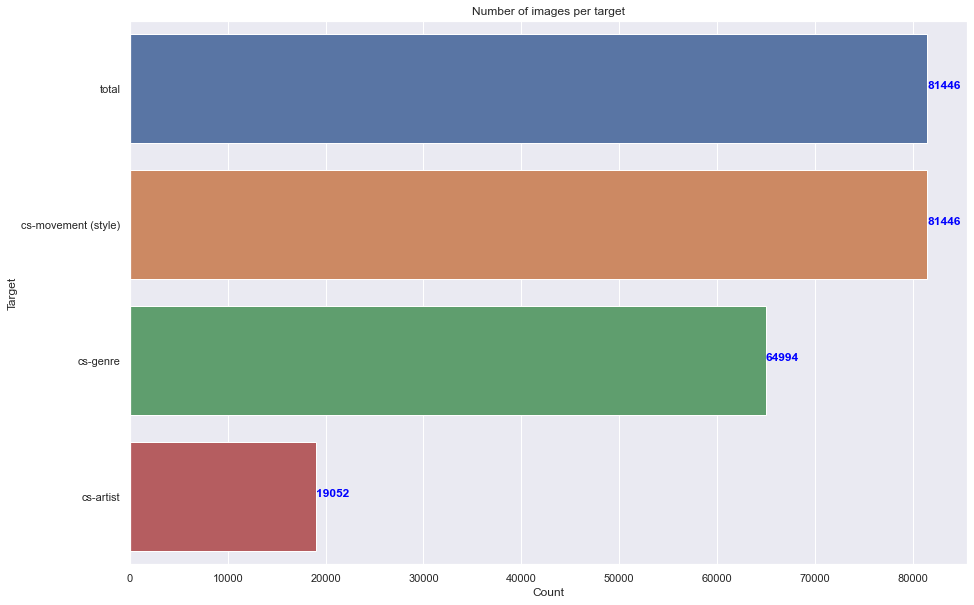

In [14]:
col = ['cs-split-artist','cs-split-genre','cs-split-style','path']

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=data[col].count().index, 
            x=data[col].count().values,
            order=data[col].count().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data[col].count().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_yticklabels(['total','cs-movement (style)','cs-genre','cs-artist']);
ax.set_title("Number of images per target");
ax.set_xlabel("Count");
ax.set_ylabel("Target");

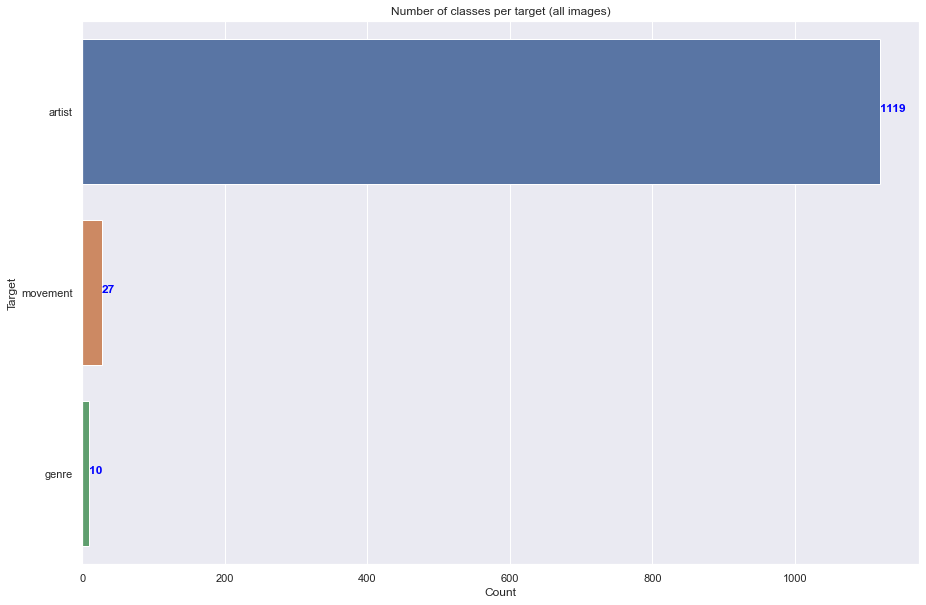

In [15]:
col = ['artist','genre','movement']

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=data[col].nunique().index, 
            x=data[col].nunique().values,
            order=data[col].nunique().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data[col].nunique().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of classes per target (all images)");
ax.set_xlabel("Count");
ax.set_ylabel("Target");

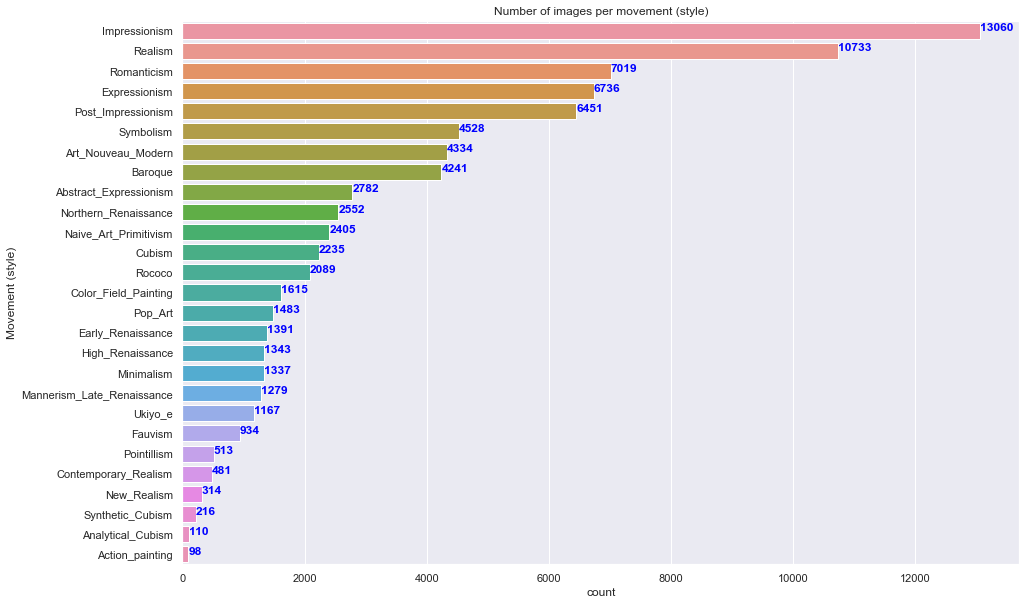

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data, y="movement", 
              order = data['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per movement (style)");
ax.set_ylabel("Movement (style)");

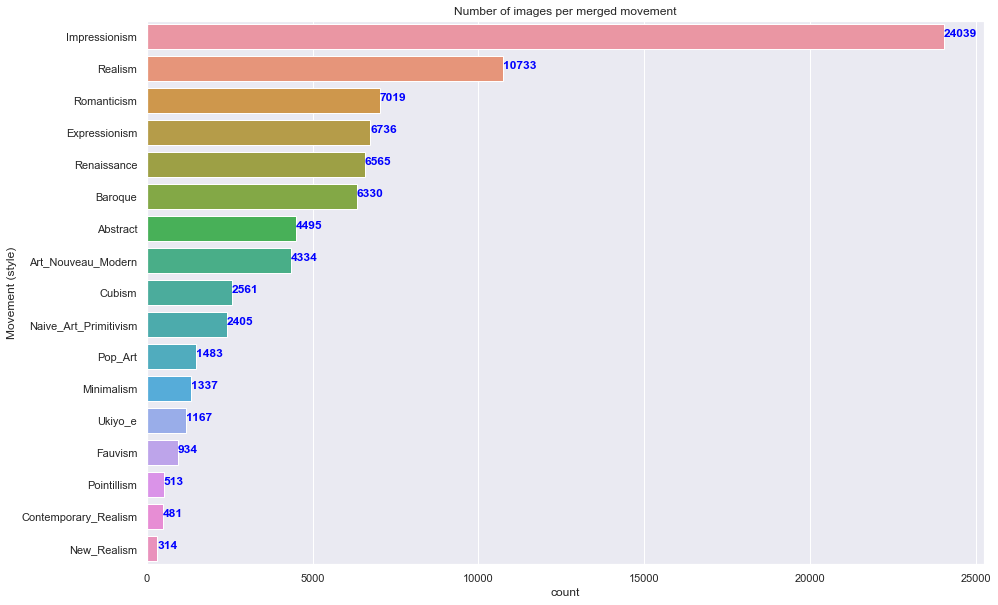

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data_merge, y="movement", 
              order = data_merge['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data_merge["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per merged movement");
ax.set_ylabel("Movement (style)");

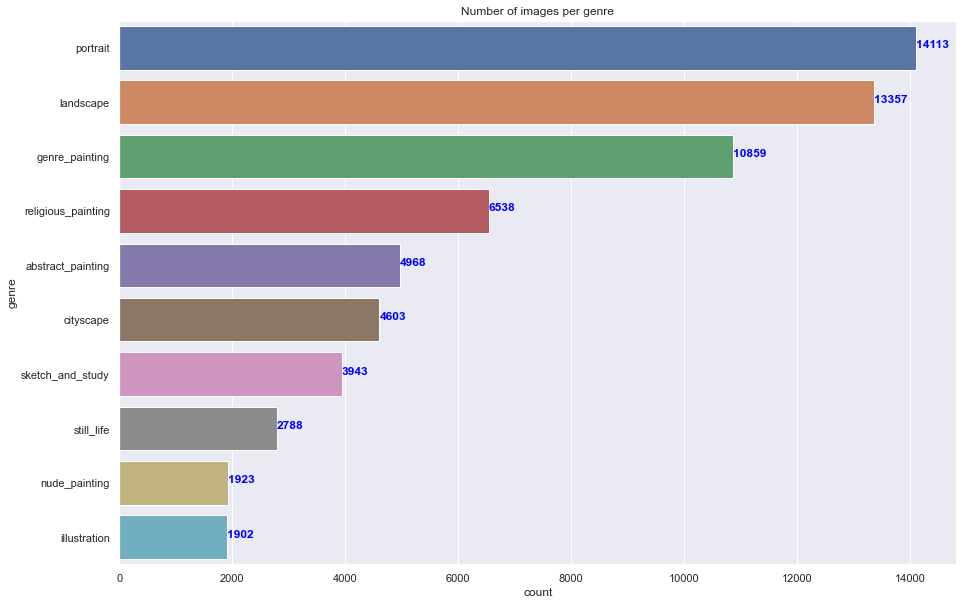

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data, y="genre", 
              order = data['genre'].value_counts().index,
              ax=ax);

for i, v in enumerate(data["genre"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per genre");

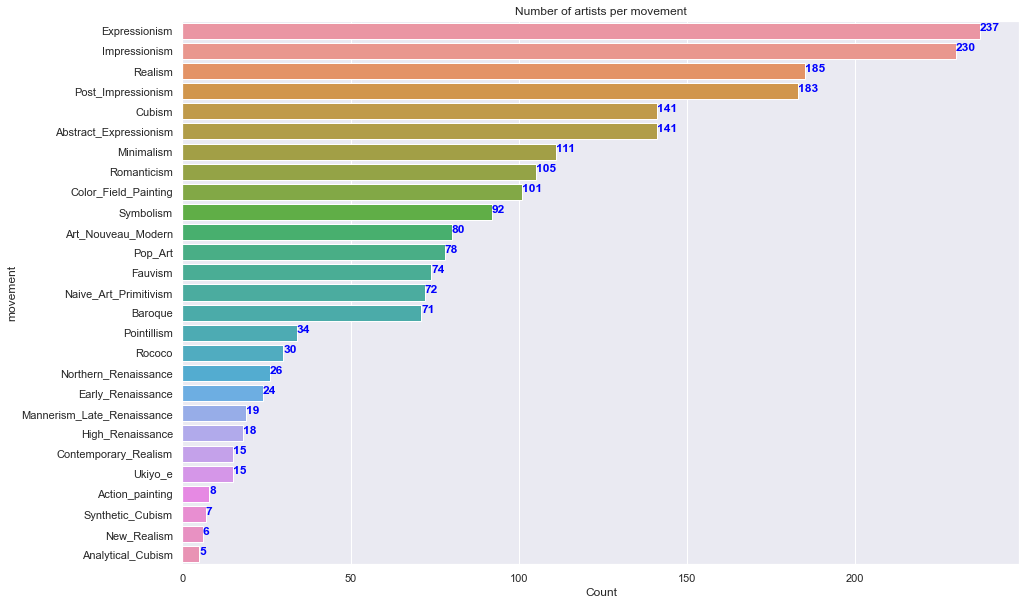

In [19]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.barplot(y=data.groupby("movement").artist.nunique().index, 
            x=data.groupby("movement").artist.nunique().values,
            order=data.groupby("movement").artist.nunique().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data.groupby("movement").artist.nunique().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of artists per movement");
ax.set_xlabel("Count");

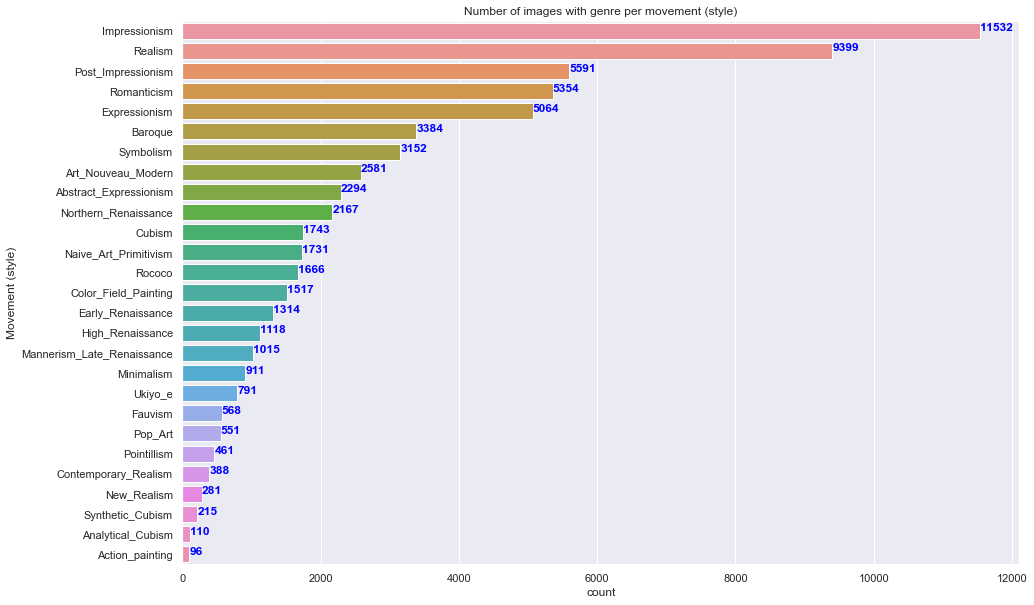

In [20]:
data2 = data[data["cs-split-genre"].notnull()]

fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data2, y="movement", 
              order = data2['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data2["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images with genre per movement (style)");
ax.set_ylabel("Movement (style)");

In [22]:
data[data["cs-split-genre"].notnull()][data["movement"]=="Abstract_Expressionism"].head()

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,path,movement,artist,title,image,genre,cs-split-genre,cs-split-style,cs-split-artist
75530,Abstract_Expressionism/joan-mitchell_untitled-...,Abstract_Expressionism,joan-mitchell,untitled-1958.jpg,joan-mitchell_untitled-1958.jpg,abstract_painting,train,train,NaN
75532,Abstract_Expressionism/brice-marden_han-shan-e...,Abstract_Expressionism,brice-marden,han-shan-exit-1992.jpg,brice-marden_han-shan-exit-1992.jpg,abstract_painting,val,val,NaN
75533,Abstract_Expressionism/atsuko-tanaka_93e-1993.jpg,Abstract_Expressionism,atsuko-tanaka,93e-1993.jpg,atsuko-tanaka_93e-1993.jpg,abstract_painting,train,train,NaN
75534,Abstract_Expressionism/atsuko-tanaka_untitled-...,Abstract_Expressionism,atsuko-tanaka,untitled-1963.jpg,atsuko-tanaka_untitled-1963.jpg,abstract_painting,train,train,NaN
75535,Abstract_Expressionism/lee-krasner_untitled-19...,Abstract_Expressionism,lee-krasner,untitled-1964.jpg,lee-krasner_untitled-1964.jpg,abstract_painting,train,train,NaN


In [368]:
#Quick function to display a sample of the selected database

def show_samples(df,sample_size=10):

    root_path='../raw_data/wikiart//wikiart-movement-class_27/'
    sample=df.sample(n=sample_size).reset_index()

    folder_path=list(sample['path'])
    fig = plt.figure(constrained_layout=True,figsize=(10,5*sample_size))

    for i in list(range(0,sample_size)):
        artist=sample['artist'][i]
        movement=sample['movement'][i]
        title=sample['title'][i]
        path=root_path+sample['path'][i]

        plt.subplot(sample_size,1,i+1)
        image=plt.imread(path)
        label=f'{movement} - {title} by {artist}'
        plt.text(x=10,y=-2,s=label)
        plt.imshow(image)
        plt.axis("off")

In [313]:
merge1=['Abstract_Expressionism','Action_painting']
merge2=['Analytical_Cubism','Cubism','Synthetic_Cubism']
merge3=['Rococo','Baroque']
merge4=['Early_Renaissance','High_Renaissance','Northern_Renaissance']
merge5=['Impressionism','Post_Impressionism','Symbolism']
merge6=['Contemporary_Realism','New_Realism']

#isolation of df to quick check similarities :
df1=data[data.movement.isin(merge1)]
df2=data[data.movement.isin(merge2)]
df3=data[data.movement.isin(merge3)]
df4=data[data.movement.isin(merge4)]
df5=data[data.movement.isin(merge5)]
df6=data[data.movement.isin(merge6)]

# Merge study


## Summary + initial database

**Final list of proposed splits :**

- Merge1 : merge_mov1 ; Modèle facile avec des mouvements très spécifiques, presque uniquement des drops, un seul merge sur renaissance 
- Merge2 : merge_mov2 ; Modèle facile, merge d'une partie des mouvements droppés précédements , drop limités 
- Merge3 : merge_mov3 ; Modèle complet, merge d'une partie des mouvements droppés précédements , aucun drop hormis duplicatas de Chan
- Merge4 : merge_mov4 : Modèle initial, pas de merge, mouvements de la db de Chan
- Merge5 : merge_mov5 : Modèle plus complet, split sur les mouvements majoritaires par courant/école/nationalité des artistes

**Methodo :**

- General review of movements
- Basic split : movements regroupment / dropping

- Historical Detailed plits : dive into artists specific schools / periods / sub-movements ?
- Technical Detailed split : dive into images specificities ? color balances (could be synonymous of a period for an artist) ? painting format ?

**Database :**

- add regex to scan period min/max


In [77]:
df=get_data(csv_path, image_path, create_csv=True)
df.drop(columns=['cs-split-genre','cs-split-style','cs-split-artist'],inplace=True)

In [116]:
if df['title'].str.extract(r'([0-9]{4})') is not '':
    df['date']=df['title'].str.extract(r'([0-9]{4})').astype(float)

In [255]:
#Create dictionnaries to merge movements
mov_dict_init={ i : i for i in df_mov['movement'] }
mov_dict_init

{'Abstract_Expressionism': 'Abstract_Expressionism',
 'Action_painting': 'Action_painting',
 'Analytical_Cubism': 'Analytical_Cubism',
 'Art_Nouveau_Modern': 'Art_Nouveau_Modern',
 'Baroque': 'Baroque',
 'Color_Field_Painting': 'Color_Field_Painting',
 'Contemporary_Realism': 'Contemporary_Realism',
 'Cubism': 'Cubism',
 'Early_Renaissance': 'Early_Renaissance',
 'Expressionism': 'Expressionism',
 'Fauvism': 'Fauvism',
 'High_Renaissance': 'High_Renaissance',
 'Impressionism': 'Impressionism',
 'Mannerism_Late_Renaissance': 'Mannerism_Late_Renaissance',
 'Minimalism': 'Minimalism',
 'Naive_Art_Primitivism': 'Naive_Art_Primitivism',
 'New_Realism': 'New_Realism',
 'Northern_Renaissance': 'Northern_Renaissance',
 'Pointillism': 'Pointillism',
 'Pop_Art': 'Pop_Art',
 'Post_Impressionism': 'Post_Impressionism',
 'Realism': 'Realism',
 'Rococo': 'Rococo',
 'Romanticism': 'Romanticism',
 'Symbolism': 'Symbolism',
 'Synthetic_Cubism': 'Synthetic_Cubism',
 'Ukiyo_e': 'Ukiyo_e'}

## Movements review

In [339]:
#General function to display synthesis table by movement from a specific dataframe

def df_grouping(df):
    df_mov=df.groupby(by='movement').nunique()
    df_mov['Q1_year']=df.groupby(by='movement').quantile(0.25)['date'].astype(int)
    df_mov['Q3_year']=df.groupby(by='movement').quantile(0.75)['date'].astype(int)
    df_mov['mean_year']=df.groupby(by='movement').mean()['date'].astype(int)
    df_mov['duration']=df_mov['Q3_year']-df_mov['Q1_year']
    df_mov['artist_ratio']=round(df_mov['title']/df_mov['artist'],2)
    df_mov.drop(columns=['path','date'],inplace=True)
    df_mov.sort_values(['mean_year'])
    df_mov.reset_index(inplace=True)
    return df_mov

In [337]:
df_mov=df_grouping(df)

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



In [1]:
#Print original movements
fig =px.scatter(df_mov,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig.update_traces(textposition='top center')
fig.update_layout(title='Movements Initial Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig.show()

NameError: name 'px' is not defined

##### TO DO

Add analysis from country origin by artists or even more detailed artist data

## Basic splits

**Merge1 :** 

Modèle facile avec des mouvements très spécifiques, presque uniquement des drops, un seul merge sur renaissance :
- Bonne taille de dataset : drop des mouvements avec moins de 1000 paintings
- Artist ratio élevé : plus d'exemples par artistes pour fitter drop si <25
- merge unique :
        Renaissance=['Early_Renaissance','High_Renaissance','Northern_Renaissance']





In [366]:
merge_mov1={'Abstract_Expressionism': None,
                 'Action_painting': None,
                 'Analytical_Cubism': None,
                 'Art_Nouveau_Modern': 'Art_Nouveau_Modern',
                 'Baroque': 'Baroque',
                 'Color_Field_Painting': None,
                 'Contemporary_Realism': None,
                 'Cubism': None,
                 'Early_Renaissance': 'Renaissance',
                 'Expressionism': 'Expressionism',
                 'Fauvism': None,
                 'High_Renaissance': 'Renaissance',
                 'Impressionism': 'Impressionism',
                 'Mannerism_Late_Renaissance': 'Mannerism_Late_Renaissance',
                 'Minimalism': None,
                 'Naive_Art_Primitivism': 'Naive_Art_Primitivism',
                 'New_Realism': None,
                 'Northern_Renaissance': 'Renaissance',
                 'Pointillism': None,
                 'Pop_Art': None,
                 'Post_Impressionism': 'Post_Impressionism',
                 'Realism': 'Realism',
                 'Rococo': 'Rococo',
                 'Romanticism': 'Romanticism',
                 'Symbolism': 'Symbolism',
                 'Synthetic_Cubism': None,
                 'Ukiyo_e': 'Ukiyo_e'}
df_mov1=df_grouping(df.replace(merge_mov1.keys(),merge_mov1.values()))
df_mov1.head()

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



,movement,artist,title,image,genre,Q1_year,Q3_year,mean_year,duration,artist_ratio
0,Art_Nouveau_Modern,80,4308,4334,9,1900,1916,1907,16,53.85
1,Baroque,71,4083,4241,10,1630,1659,1647,29,57.51
2,Expressionism,237,6389,6736,10,1913,1947,1947,34,26.96
3,Impressionism,230,12660,13060,9,1882,1909,1897,27,55.04
4,Mannerism_Late_Renaissance,19,1215,1279,8,1542,1578,1558,36,63.95


In [357]:
fig1 =px.scatter(df_mov1,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig1.update_traces(textposition='top center')
fig1.update_layout(title='Movements Merge1 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig1.show()

**Merge2 :**

Modèle facile, merge d'une partie des mouvements droppés précédements , drop limités :

- Bonne taille de dataset : drop des mouvements avec moins de 1000 paintings
- Artist ratio modéré: plus d'exemples par artistes pour fitter drop si <15
- Merging des mouvements sous représentés par proximité
        Abstract=['Abstract_Expressionism','Action_painting']
        Cubism=['Analytical_Cubism','Cubism','Synthetic_Cubism']
        Renaissance=['Early_Renaissance','High_Renaissance','Northern_Renaissance']
        New_Realism=['Contemporary_Realism','New_Realism']



In [365]:
merge_mov2={'Abstract_Expressionism': 'Abstract',
                 'Action_painting': 'Abstract',
                 'Analytical_Cubism': 'Cubism',
                 'Art_Nouveau_Modern': 'Art_Nouveau_Modern',
                 'Baroque': 'Baroque',
                 'Color_Field_Painting': None,
                 'Contemporary_Realism': 'New_Realism',
                 'Cubism': 'Cubism',
                 'Early_Renaissance': 'Renaissance',
                 'Expressionism': 'Expressionism',
                 'Fauvism': None,
                 'High_Renaissance': 'Renaissance',
                 'Impressionism': 'Impressionism',
                 'Mannerism_Late_Renaissance': 'Mannerism_Late_Renaissance',
                 'Minimalism': None,
                 'Naive_Art_Primitivism': 'Naive_Art_Primitivism',
                 'New_Realism': 'New_Realism',
                 'Northern_Renaissance': 'Renaissance',
                 'Pointillism': None,
                 'Pop_Art': 'Pop_Art',
                 'Post_Impressionism': 'Post_Impressionism',
                 'Realism': 'Realism',
                 'Rococo': 'Rococo',
                 'Romanticism': 'Romanticism',
                 'Symbolism': 'Symbolism',
                 'Synthetic_Cubism': 'Cubism',
                 'Ukiyo_e': 'Ukiyo_e'}
df_mov2=df_grouping(df.replace(merge_mov2.keys(),merge_mov2.values()))
df_mov2.head()

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



,movement,artist,title,image,genre,Q1_year,Q3_year,mean_year,duration,artist_ratio
0,Abstract,144,2536,2873,10,1957,1982,1969,25,17.61
1,Art_Nouveau_Modern,80,4308,4334,9,1900,1916,1907,16,53.85
2,Baroque,71,4083,4241,10,1630,1659,1647,29,57.51
3,Cubism,142,2483,2561,10,1913,1937,1927,24,17.49
4,Expressionism,237,6389,6736,10,1913,1947,1947,34,26.96


In [359]:
fig2 =px.scatter(df_mov2,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig2.update_traces(textposition='top center')
fig2.update_layout(title='Movements Merge2 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig2.show()

**Merge3 :**

Modèle complet, merge d'une partie des mouvements droppés précédements , auncun drop hormis duplicatas de Chan:

    - Merge des mouvements à taille limitée (<500 oeuvres) selon la même méthodo que le Merge2
    - Mouvements majeur (impressionisme / realisme / Romantisme) : pas de split par auteurs/écoles/pays


In [364]:
merge_mov3={'Abstract_Expressionism': 'Abstract',
                 'Action_painting': 'Abstract',
                 'Analytical_Cubism': 'Cubism',
                 'Art_Nouveau_Modern': 'Art_Nouveau_Modern',
                 'Baroque': 'Baroque',
                 'Color_Field_Painting': 'Color_Field_Painting',
                 'Contemporary_Realism': 'New_Realism',
                 'Cubism': 'Cubism',
                 'Early_Renaissance': 'Renaissance',
                 'Expressionism': 'Expressionism',
                 'Fauvism': 'Fauvism',
                 'High_Renaissance': 'Renaissance',
                 'Impressionism': 'Impressionism',
                 'Mannerism_Late_Renaissance': 'Mannerism_Late_Renaissance',
                 'Minimalism': 'Minimalism',
                 'Naive_Art_Primitivism': 'Naive_Art_Primitivism',
                 'New_Realism': 'New_Realism',
                 'Northern_Renaissance': 'Renaissance',
                 'Pointillism': 'Pointillism',
                 'Pop_Art': 'Pop_Art',
                 'Post_Impressionism': 'Post_Impressionism',
                 'Realism': 'Realism',
                 'Rococo': 'Rococo',
                 'Romanticism': 'Romanticism',
                 'Symbolism': 'Symbolism',
                 'Synthetic_Cubism': 'Cubism',
                 'Ukiyo_e': 'Ukiyo_e'}
df_mov3=df_grouping(df.replace(merge_mov3.keys(),merge_mov3.values()))
df_mov3.head()

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



,movement,artist,title,image,genre,Q1_year,Q3_year,mean_year,duration,artist_ratio
0,Abstract,144,2536,2873,10,1957,1982,1969,25,17.61
1,Art_Nouveau_Modern,80,4308,4334,9,1900,1916,1907,16,53.85
2,Baroque,71,4083,4241,10,1630,1659,1647,29,57.51
3,Color_Field_Painting,101,1510,1615,2,1963,1979,1971,16,14.95
4,Cubism,142,2483,2561,10,1913,1937,1927,24,17.49


In [362]:
fig3 =px.scatter(df_mov3,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig3.update_traces(textposition='top center')
fig3.update_layout(title='Movements Merge3 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig3.show()

## By Artist

- check artist vs movement (identification by artist ?)
- does an artist have several movements ?
- check Impressionism split by artists

In [69]:
df_artist=data_merge.groupby(by='artist').nunique()
df_artist.head()


,path,movement,title,image,genre,cs-split-genre,cs-split-style,cs-split-artist
artist,,,,,,,,
a.y.-jackson,34,2,30,30,1,2,2,0
aaron-siskind,23,1,23,23,0,0,2,0
abdullah-suriosubroto,18,1,18,18,1,2,2,0
abidin-dino,13,2,13,13,4,1,2,0
abraham-manievich,47,4,42,42,5,2,2,0


In [29]:
df_impr=data_merge[data_merge.movement.isin(['Impressionism'])]

In [31]:
df_impr.describe()

,path,movement,artist,title,image,genre,cs-split-genre,cs-split-style,cs-split-artist
count,24039,24039,24039,24039,24039,20275,20275,24039,8956
unique,24002,1,375,23051,24002,10,2,2,2
top,Impressionism/jacek-malczewski_enslavement.jpg,Impressionism,pierre-auguste-renoir,self-portrait.jpg,jacek-malczewski_enslavement.jpg,landscape,train,train,train
freq,2,24039,1376,37,2,7150,14184,16828,6272
